In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor, DMatrix, train

In [2]:
columns = [
    'neighbourhood_group', 'room_type', 'latitude', 'longitude',
    'minimum_nights', 'number_of_reviews','reviews_per_month',
    'calculated_host_listings_count', 'availability_365',
    'price'
]

df = pd.read_csv('AB_NYC_2019.csv', usecols=columns)
df.reviews_per_month = df.reviews_per_month.fillna(0)

In [3]:
X = df.drop(columns = "price")
y = df.price
y = np.log1p(y)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, test_size = 0.2, random_state = 1)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, shuffle = True, test_size = 0.2, random_state = 1)

In [5]:
train_dicts = X_train.to_dict(orient = "records")

In [7]:
dv = DictVectorizer(sparse = False)
X_train = dv.fit_transform(train_dicts)

In [8]:
valid_dicts = X_valid.to_dict(orient = "records")

In [9]:
X_valid = dv.fit_transform(valid_dicts)

In [10]:
tree1 = DecisionTreeRegressor(max_depth=1)

In [11]:
tree1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   latitude                        48895 non-null  float64
 2   longitude                       48895 non-null  float64
 3   room_type                       48895 non-null  object 
 4   minimum_nights                  48895 non-null  int64  
 5   number_of_reviews               48895 non-null  int64  
 6   reviews_per_month               48895 non-null  float64
 7   calculated_host_listings_count  48895 non-null  int64  
 8   availability_365                48895 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 3.4+ MB


In [13]:
df.shape, X.shape

((48895, 10), (48895, 9))

[Text(697.5, 815.4000000000001, 'room_type=Entire home/apt <= 0.5\nmse = 0.486\nsamples = 31292\nvalue = 4.738'),
 Text(348.75, 271.79999999999995, 'mse = 0.281\nsamples = 14991\nvalue = 4.291'),
 Text(1046.25, 271.79999999999995, 'mse = 0.32\nsamples = 16301\nvalue = 5.15')]

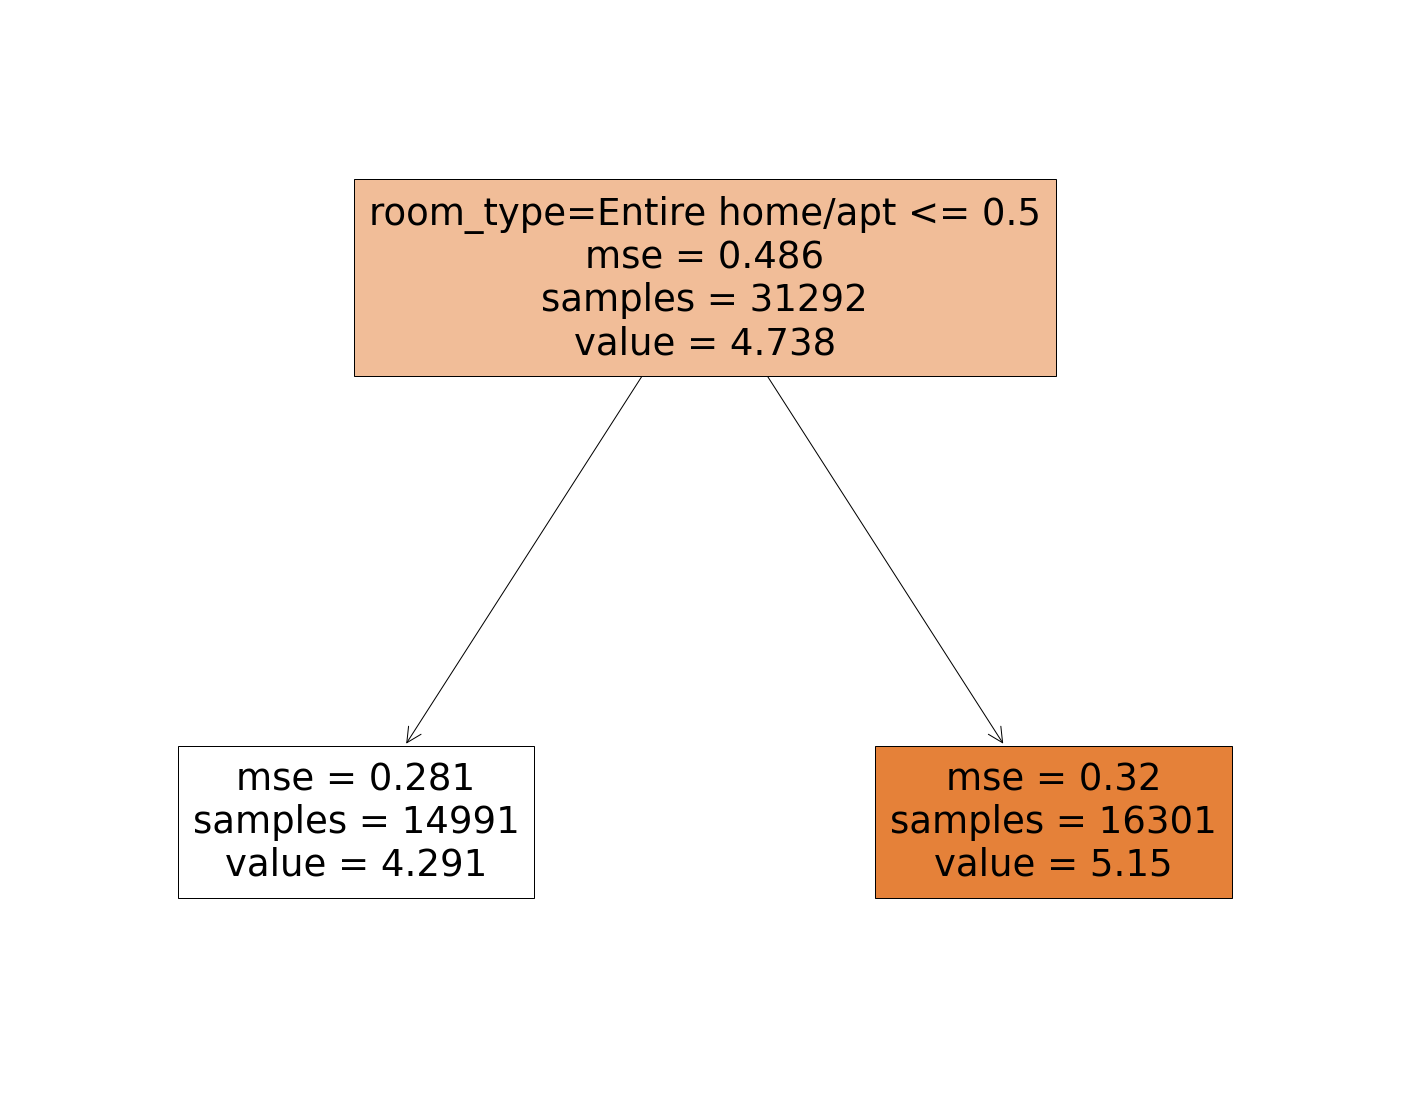

In [14]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(tree1, feature_names=dv.get_feature_names(), filled=True)

In [15]:
rf_1 = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)

In [16]:
rf_1.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [17]:
y_pred = rf_1.predict(X_valid)

In [18]:
mean_squared_error(y_valid, y_pred, squared = False)

0.46078067210100937

In [19]:
# np.arange()

In [20]:
for x in np.arange(10, 201, step = 10):
    rf_1 = RandomForestRegressor(n_estimators=x, random_state=1, n_jobs=-1)
    rf_1.fit(X_train, y_train)
    y_pred = rf_1.predict(X_valid)
    print(x, mean_squared_error(y_valid, y_pred, squared = False))

10 0.46078067210100937
20 0.4477734275103014
30 0.44348203033518463
40 0.4421868299723399
50 0.4414563841054784
60 0.4409265549453157
70 0.44015536393193144
80 0.43958432181362317
90 0.43935814374764653
100 0.43912841008144876
110 0.4387094007857012
120 0.43848857961017723
130 0.43808529516967026
140 0.43793312374001275
150 0.4379224946086783
160 0.4378122599508284
170 0.4376151730486301
180 0.4376249204741554
190 0.4374779847346011
200 0.43754618547576885


In [21]:
rmsescores = []

for x in [10, 15, 20, 25]:
    for y in np.arange(10, 201, step = 10):
        rf_1 = RandomForestRegressor(n_estimators=y, random_state=1, n_jobs=-1, max_depth = x)
        rf_1.fit(X_train, y_train)
        y_pred = rf_1.predict(X_valid)
        rmsescores.append((x, y, mean_squared_error(y_valid, y_pred, squared = False)))

In [22]:
dfObj = pd.DataFrame(rmsescores, columns = ['maxdepth' , 'nestimator', 'rmse']) 

In [23]:
print(dfObj.groupby(["maxdepth", "nestimator"])["rmse"].agg("mean"))

maxdepth  nestimator
10        10            0.446011
          20            0.442885
          30            0.441649
          40            0.441198
          50            0.441206
                          ...   
25        160           0.437553
          170           0.437327
          180           0.437374
          190           0.437263
          200           0.437273
Name: rmse, Length: 80, dtype: float64


In [24]:
rf_1 = RandomForestRegressor(n_estimators=10, max_depth=20,random_state=1,n_jobs=-1)
rf_1.fit(X_train, y_train)
# y_pred = rf_1.predict(X_valid)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [25]:
rf_1.feature_importances_

array([7.58340154e-02, 3.09508761e-02, 1.46058745e-01, 1.57972654e-01,
       5.35609942e-02, 3.39940583e-04, 1.04439120e-03, 3.50969466e-02,
       9.19778296e-04, 8.99053957e-05, 4.33748495e-02, 5.30651632e-02,
       3.92559450e-01, 3.17492138e-03, 5.95736910e-03])

In [26]:
feature_imp = pd.Series(rf_1.feature_importances_ ,index = dv.get_feature_names()).sort_values(ascending=False)

In [27]:
feature_imp

room_type=Entire home/apt            0.392559
longitude                            0.157973
latitude                             0.146059
availability_365                     0.075834
minimum_nights                       0.053561
reviews_per_month                    0.053065
number_of_reviews                    0.043375
neighbourhood_group=Manhattan        0.035097
calculated_host_listings_count       0.030951
room_type=Shared room                0.005957
room_type=Private room               0.003175
neighbourhood_group=Brooklyn         0.001044
neighbourhood_group=Queens           0.000920
neighbourhood_group=Bronx            0.000340
neighbourhood_group=Staten Island    0.000090
dtype: float64

In [43]:
xgb_params = {
    'learning_rate': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    'n_jobs': -1,
    'random_state': 1,
    'verbosity': 1
}

In [45]:
xgbmodel = XGBRegressor(**xgb_params, n_estimators=100, objective='reg:squarederror')
xgbmodel.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=1)

In [46]:
y_pred = xgbmodel.predict(X_valid)

In [47]:
mean_squared_error(y_valid, y_pred, squared = False).round(4)

0.4372

In [48]:
xgb_params2 = {
    'learning_rate': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    'n_jobs': -1,
    'random_state': 1,
    'verbosity': 1
}

In [49]:
xgbmodel2 = XGBRegressor(**xgb_params2, n_estimators=100, objective='reg:squarederror')
xgbmodel2.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=1)

In [50]:
y_pred = xgbmodel2.predict(X_valid)

In [51]:
mean_squared_error(y_valid, y_pred, squared = False).round(4)

0.4346

In [52]:
xgb_params3 = {
    'learning_rate': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,
    'n_jobs': -1,
    'random_state': 1,
    'verbosity': 1
}

In [53]:
xgbmodel3 = XGBRegressor(**xgb_params3, n_estimators=100, objective='reg:squarederror')
xgbmodel3.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=1)

In [54]:
y_pred = xgbmodel3.predict(X_valid)

In [55]:
mean_squared_error(y_valid, y_pred, squared = False).round(4)

1.6313